In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

Now that we have our variably expressed genes, let's see if we can find some interesting information about them. A good place to start is by looking at different classes of genes aligned with certain cellular pathways. We are going to start by looking at the representation of mitochondrial genes in our samples. A manually curated list of mitochondrial genes can be found [here](https://www.broadinstitute.org/files/shared/metabolism/mitocarta/mouse.mitocarta.2.0.html).

Let's start by loading in our complete list of mouse gene names from a simplified gene annotation file (.gtf), which is a tab-separated file: 

In [2]:
reference = pd.read_table("/oasis/tscc/scratch/cshl_2018/reference_files/mm10/mm10.reduced.gtf")
reference.head()

/home/ucsd-train25/anaconda2/envs/py3_cshl/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,chr,start,end,strand,gene_name,gene_id,transcript_name,transcript_id,transcriptType,annotationType,annotationIDs
0,1,3102016,3102125,+,Gm26206,ENSMUSG00000064842,Gm26206-201,ENSMUST00000082908,snRNA,transcript,NaN
1,1,3102016,3102125,+,Gm26206,ENSMUSG00000064842,Gm26206-201,ENSMUST00000082908,snRNA,exon,NaN
2,1,3102016,3102125,+,Gm26206,ENSMUSG00000064842,NaN,NaN,snRNA,gene,NaN
3,1,3205901,3207317,-,Xkr4,ENSMUSG00000051951,Xkr4-003,ENSMUST00000162897,protein_coding,exon,NaN
4,1,3205901,3216344,-,Xkr4,ENSMUSG00000051951,Xkr4-003,ENSMUST00000162897,protein_coding,transcript,NaN


We will then do the same thing for our list of mitochondrial genes, which we downloaded in the form of an Excel spreadsheet. Pandas can read in Excel dataframes so long as you specify the sheet title:

In [7]:
mito_genes = pd.read_excel("/oasis/tscc/scratch/cshl_2018/reference_files/mouse_mitochondrial_genes/Mouse.MitoCarta2.0.xls",
                          index_col=0, sheet_name = "A Mouse MitoCarta2.0")
mito_genes.head()

,HumanOrthologGeneID,MouseGeneID,Symbol,Synonyms,Description,EnsemblGeneID,ProteinLength,TargetP_Score,MitoDomain_Score,CoexpressionGnfN50_Score,...,liver_total_peak_intensity_log10,heart_total_peak_intensity_log10,skeletalmuscle_total_peak_intensity_log10,adipose_total_peak_intensity_log10,smallintestine_total_peak_intensity_log10,largeintestine_total_peak_intensity_log10,stomach_total_peak_intensity_log10,placenta_total_peak_intensity_log10,testis_total_peak_intensity_log10,HPA_PrimarySubcellularLocalization_2015
TrainingDataset,,,,,,,,,,,,,,,,,,,,,
Tmito,1537.0,66445,Cyc1,2610002H19Rik|AA408921|Q9D0M3,cytochrome c-1,ENSMUSG00000022551,325,2.0,MitoDomain,49.0,...,10.0,10.4,9.8,10.1,10.2,10.2,10.0,10.0,9.8,"Mitochondria (APE, Supportive)"
Tmito,5160.0,18597,Pdha1,Pdha-1|P35486,pyruvate dehydrogenase E1 alpha 1,ENSMUSG00000031299,390,1.0,MitoDomain,45.0,...,9.6,10.5,10.0,10.1,9.9,9.6,10.0,9.9,8.9,NaN
Tmito,513.0,66043,Atp5d,0610008F14Rik|1500000I11Rik|AA960090|AI876556|...,"ATP synthase, H+ transporting, mitochondrial F...",ENSMUSG00000003072,168,2.0,MitoDomain,49.0,...,9.8,9.8,9.5,9.8,10.1,10.0,9.8,9.8,9.6,NaN
Tmito,122961.0,74316,Isca2,0710001C05Rik|5730594E03Rik|Hbld1|Q9DCB8,iron-sulfur cluster assembly 2 homolog (S. cer...,ENSMUSG00000021241,154,1.0,MitoDomain,28.0,...,8.2,7.9,7.2,8.7,8.5,8.4,8.0,8.5,8.5,NaN
Tmito,7384.0,22273,Uqcrc1,1110032G10Rik|Q9CZ13,ubiquinol-cytochrome c reductase core protein 1,ENSMUSG00000025651,480,1.0,MitoDomain,49.0,...,10.0,10.8,10.3,10.1,10.6,10.2,10.3,10.2,9.9,"Cytoplasm;Mitochondria (APE, Supportive)"


We'll then pick out mitochondrial gene names from the column 'Symbol' and save it as a list. We'll also make a separate data table from our annotation file consisting only of 'gene_id' and 'gene_name', where 'gene_id' will serve as our index:

In [8]:
mito_gene_list = list(mito_genes['Symbol'])

In [9]:
small = reference[['gene_id','gene_name']].set_index('gene_id')
print(small.shape)
small.head()

(1659564, 1)


,gene_name
gene_id,
ENSMUSG00000064842,Gm26206
ENSMUSG00000064842,Gm26206
ENSMUSG00000064842,Gm26206
ENSMUSG00000051951,Xkr4
ENSMUSG00000051951,Xkr4


We will also opt to drop redundant gene listings extracted from our .gtf file:

In [11]:
gene_id_to_name = small.drop_duplicates()
print(gene_id_to_name.shape)
gene_id_to_name.head()

(32813, 1)


,gene_name
gene_id,
ENSMUSG00000064842,Gm26206
ENSMUSG00000051951,Xkr4
ENSMUSG00000089699,Gm1992
ENSMUSG00000088333,Gm22848
ENSMUSG00000025900,Rp1


We will now search through the list of total gene names and determine whether or not each gene is listed as a mitochondrial gene. In doing so, we will ascribe either a True or False value in a separate column called 'mitochondrial'. This value is known as a boolean, and serves as a means of logical indexing. We can then count from the total number of genes that are labaled as mitochondrial:

In [12]:
gene_id_to_name['mitochondrial'] = gene_id_to_name['gene_name'].apply(lambda x: x in mito_gene_list)
mito_genes = gene_id_to_name.loc[gene_id_to_name['mitochondrial'] == True]
mito_genes_list = list(mito_genes.index)
mito_genes.head()

/home/ucsd-train25/anaconda2/envs/py3_cshl/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,gene_name,mitochondrial
gene_id,,
ENSMUSG00000033845,Mrpl15,True
ENSMUSG00000025903,Lypla1,True
ENSMUSG00000025911,Adhfe1,True
ENSMUSG00000025937,Lactb2,True
ENSMUSG00000025940,Tmem70,True


In [13]:
print(len(gene_id_to_name))
print(len(mito_genes))

32813
1136


Now let's load in our normalized counts matrix for our samples that has been annotated with gene names:

In [14]:
data_dir = "/home/ucsd-train25/scratch/projects/haber_atlas_all/processed_files/"

expression = pd.read_csv(data_dir+"batch_corrected_tpm.csv", index_col=0)
print(expression.shape)
expression.head()

(15971, 7216)


,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,B1_AAAGACGATTGTCT_Enterocyte.Mature.Proximal,...,B10_TTCAGTTGCCTCGT_Enterocyte.Mature.Proximal,B10_TTCATGACCATTCT_Enterocyte.Progenitor.Early,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth
Mrpl15,2.088305,2.122498,1.791026,1.694042,-0.059939,2.517569,-0.059939,1.525161,1.986820,-0.059939,...,2.173911,1.482088,0.013574,0.013574,0.013574,3.329423,0.013574,0.013574,3.610239,1.566565
Lypla1,2.168687,0.014101,0.014101,1.140476,0.014101,0.014101,0.014101,0.014101,0.842176,0.014101,...,-0.035706,-0.035706,-0.035706,-0.035706,-0.035706,0.769612,-0.035706,-0.035706,-0.035706,0.437549
Gm37988,-0.000223,-0.000223,-0.000223,-0.000223,-0.000223,-0.000223,-0.000223,-0.000223,-0.000223,-0.000223,...,0.000608,0.000608,0.000608,0.000608,0.000608,0.000608,0.000608,0.000608,0.000608,0.000608
Tcea1,-0.028303,-0.028303,-0.028303,-0.028303,-0.028303,-0.028303,-0.028303,-0.028303,-0.028303,-0.028303,...,-0.002335,-0.002335,-0.002335,-0.002335,-0.002335,-0.002335,-0.002335,-0.002335,-0.002335,-0.002335
Atp6v1h,-0.021668,-0.021668,-0.021668,-0.021668,-0.021668,-0.021668,-0.021668,-0.021668,-0.021668,-0.021668,...,-0.013490,0.935967,-0.013490,1.681670,-0.013490,1.353792,-0.013490,-0.013490,-0.013490,0.476496


Let's next combine our dataframe with our list of mitochondrial genes in a separate dataframe (expression_new). We can then find all of the genes that have a True value for mitochondrial classification:

In [15]:
expression_new = expression.reset_index()

expression_new['mito'] = expression_new['index'].apply((lambda x: x in mito_gene_list))
expression_new.loc[expression_new['mito'] == True]

,index,B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal,B1_AAACCGTGCCAAGT_Tuft,B1_AAACGCACAGCCTA_Goblet,B1_AAACGCACCAGATC_Endocrine,B1_AAACGCACCGCCTT_Stem,B1_AAACGCACCGTAGT_Stem,B1_AAACGGCTGATAGA_TA.Early,B1_AAACTTGAAGAGTA_Enterocyte.Mature.Proximal,B1_AAACTTGACCACAA_TA.G1,...,B10_TTCATGACCATTCT_Enterocyte.Progenitor.Early,B10_TTCATGTGCGAGTT_Goblet,B10_TTCCAAACTAGAGA_Goblet,B10_TTCGGAGAGACGTT_Enterocyte.Progenitor.Early,B10_TTCTACGAATGCCA_Enterocyte.Progenitor.Early,B10_TTCTGATGGCATCA_Enterocyte.Progenitor.Early,B10_TTGACACTACCAAC_TA.G2,B10_TTGAGGTGTACTCT_Enterocyte.Mature.Proximal,B10_TTGCTATGGGCATT_Paneth,mito
0,Mrpl15,2.088305,2.122498,1.791026,1.694042,-0.059939,2.517569,-0.059939,1.525161,1.986820,...,1.482088,0.013574,0.013574,0.013574,3.329423,0.013574,0.013574,3.610239,1.566565,True
1,Lypla1,2.168687,0.014101,0.014101,1.140476,0.014101,0.014101,0.014101,0.014101,0.842176,...,-0.035706,-0.035706,-0.035706,-0.035706,0.769612,-0.035706,-0.035706,-0.035706,0.437549,True
13,Adhfe1,0.001140,0.001140,0.001140,0.001140,0.001140,0.001140,0.001140,0.001140,0.001140,...,0.003048,0.003048,0.003048,0.003048,0.003048,0.003048,0.003048,0.003048,0.003048,True
28,Lactb2,1.269858,-0.015595,-0.015595,-0.015595,1.180697,1.016533,-0.015595,-0.015595,-0.015595,...,-0.000812,-0.000812,-0.000812,-0.000812,0.853460,-0.000812,-0.000812,-0.000812,-0.000812,True
39,Tmem70,1.498592,-0.001038,1.934585,-0.001038,-0.001038,1.871789,-0.001038,-0.001038,-0.001038,...,-0.002512,-0.002512,-0.002512,-0.002512,0.782969,-0.002512,-0.002512,-0.002512,-0.002512,True
91,Cox5b,4.101664,3.192990,2.997333,3.994432,3.550833,3.255447,3.909215,4.438714,2.508805,...,3.739302,3.192333,2.337088,3.987494,3.784127,2.439216,2.358433,4.259808,1.029907,True
97,Coa5,-0.030071,-0.030071,-0.030071,1.667984,-0.030071,1.084649,1.397839,-0.030071,-0.030071,...,-0.016650,-0.016650,-0.016650,-0.016650,-0.016650,-0.016650,2.024310,2.657408,-0.016650,True
102,Lipt1,0.010675,0.010675,0.010675,0.010675,0.010675,0.010675,0.010675,0.010675,0.010675,...,-0.012654,-0.012654,-0.012654,1.564553,-0.012654,-0.012654,-0.012654,-0.012654,-0.012654,True
104,Mrpl30,3.354824,0.027513,1.905355,2.254220,1.381466,2.923797,0.027513,2.895246,2.773195,...,2.246222,0.045918,1.689325,0.045918,2.304562,0.045918,2.600863,3.292205,1.611658,True
125,Mrps9,0.026523,0.026523,1.287133,1.208361,2.156985,0.026523,0.026523,1.694584,0.895373,...,0.012895,0.012895,3.137594,0.012895,0.012895,0.012895,0.012895,0.012895,1.482442,True


Let's now save this subset of our total gene counts as a separate dataframe. We can drop the 'mito' column since we know that these are all mitochondrial genes:

In [16]:
mito_subset = expression_new.loc[expression_new['mito'] == True]
mito_subset.set_index('index', drop=True, inplace=True)

In [17]:
mito_clean = mito_subset.drop(['mito'], axis=1)

An interesting component of single-cell analyses is your ability to look at the differences in genetic expression levels between different cell types. Now that we have our mitochondrial gene counts as well as total counts, we could look and see overall representation of mito genes in each cell's transcriptional pool. We can quantify this as a percentage, and plot each cell on a strip plot to look at the distribution of mitochondrial expression across individual cells:

In [18]:
percent_mito = (mito_clean.sum() / expression.sum())*100
percent_mito.head()

B1_AAACATTGTTTGGG_Enterocyte.Immature.Distal    22.746117
B1_AAACCGTGCCAAGT_Tuft                          16.983893
B1_AAACGCACAGCCTA_Goblet                        17.080448
B1_AAACGCACCAGATC_Endocrine                     18.932724
B1_AAACGCACCGCCTT_Stem                          19.624721
dtype: float64

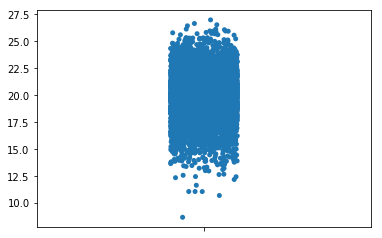

In [19]:
sns.stripplot(percent_mito.values, jitter=True, orient = 'v')